# Homework 2
## Astro 530 - Stellar Atmospheres

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import math

from astropy import units as u
from astropy import constants as c

from astropy.modeling.models import BlackBody

from astro530 import Planck

plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.xmargin'] = 0.01

In [75]:
def _trapz(y, x):
    # Integrate numerically using the trapezoid rule
    dx = np.diff(x)
    area = (y[:-1] + y[1:]) / 2 * dx
    return np.sum(area)

def NIntegrate(func, a, b, density, unit = u.dimensionless_unscaled, integrator = _trapz, **kwargs):
    '''
        func - function to numerically integrate
        a - lower bound
        b - upper bound
        density - number of subintervals per unit 
    '''
    n = round((b - a) * density)
    x = np.linspace(a, b, n)
    y = func(x * unit, **kwargs)
    return _trapz(y, x * unit)

In [88]:
def sb_law(T):
    T = T * u.K
    F = c.sigma_sb * T ** 4
    return F

def precision(temp, a, b, density, error = 0):
    true = sb_law(temp) * (1 - error)
    
    func = BlackBody(temp * u.K)
    calc_I = NIntegrate(func, a, b, density, 1/u.micron) 
    calc = np.pi * calc_I * c.c * u.sr
    
    return np.abs(1 - calc/true)

### Part a

In [89]:
bb_7500 = BlackBody(7500 * u.K)

In [90]:
intensity = NIntegrate(bb_7500, 1e-7, 24, 10000, 1/u.micron)
flux = intensity * c.c * np.pi

print('Numerical solution: {:.4e} erg/s/cm^2'.format(flux.cgs.value))
print('Analytic solution: {:.4e} erg/s/cm^2'.format(sb_law(7500).cgs.value))

Numerical solution: 1.7941e+11 erg/s/cm^2
Analytic solution: 1.7941e+11 erg/s/cm^2


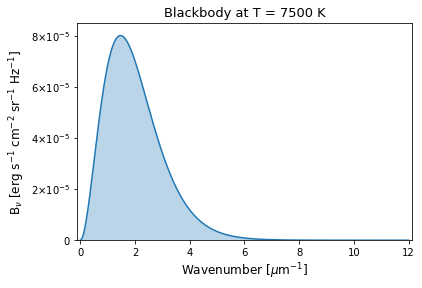

In [91]:
wv = np.linspace(1e-7, 12, 1000)
plt.plot(wv, bb_7500(wv * 1/u.micron))
plt.fill_between(wv, bb_7500(wv * 1/u.micron), alpha = 0.3)

plt.xlabel(r'Wavenumber [$\mu$m$^{-1}$]')

plt.ylabel(r'B$_\nu$ [erg s$^{-1}$ cm$^{-2}$ sr$^{-1}$ Hz$^{-1}$]')
plt.ylim(0, 8.5e-5)
plt.yticks(np.arange(0, 9, 2) * 1e-5, [0] + [str(n) + r'$\times 10^{-5}$' for n in np.arange(2, 9, 2)])

plt.title('Blackbody at T = 7500 K')

plt.savefig('hw2_fig1.png', bbox_inches = 'tight')
plt.show()

### Part b

#### Vary the lower bound

In [92]:
a_list = 10 ** np.linspace(-10, -1, 1000)
prec_a = np.array([precision(7500, a, 24, 10000) for a in a_list])

3.5444556739704353e-07


[]

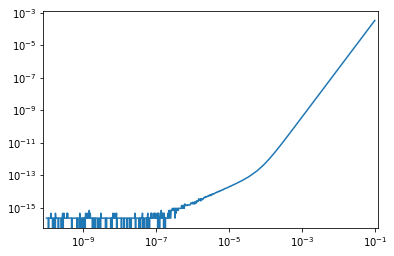

In [234]:
print(a_list[np.where(prec_a < 5e-16)[0][-1]])
plt.plot(a_list, prec_a)
plt.loglog()

#### Vary the upper bound

In [95]:
b_list = np.linspace(10, 30, 1000)
prec_b = np.array([precision(7500, 1e-7, b, 10000) for b in b_list])

23.313313313313316


[]

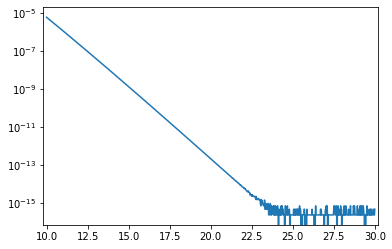

In [233]:
print(b_list[np.where(prec_b < 5e-16)[0][0]])
plt.plot(b_list, prec_b)
plt.semilogy()

#### Vary the density of subintervals

In [97]:
d_list = 10 ** np.linspace(1, 5, 1000)
prec_d = np.array([precision(7500, 1e-7, 24, d) for d in d_list])

6120.498372476696


[]

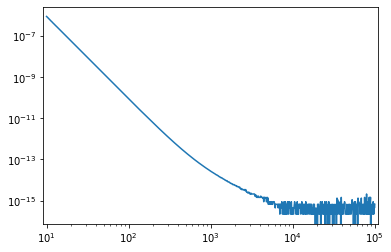

In [232]:
print(d_list[np.where(prec_d < 5e-16)[0][0]])
plt.plot(d_list, prec_d)
plt.loglog()

### Part c

In [99]:
err_a = np.array([precision(7500, a, 24, 10000, error = 1e-10) for a in a_list])
err_b = np.array([precision(7500, 1e-7, b, 10000, error = 1e-10) for b in b_list])
err_d= np.array([precision(7500, 1e-7, 24, d, error = 1e-10) for d in d_list])

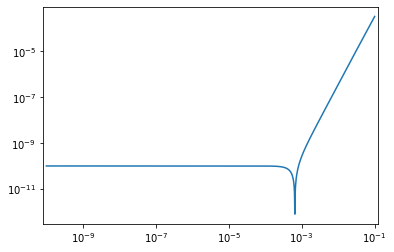

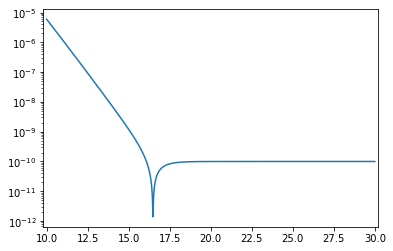

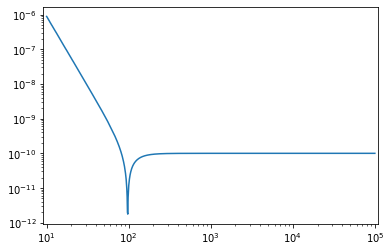

In [12]:
plt.plot(a_list, err_a)
plt.loglog()
plt.show()

plt.plot(b_list, err_b)
plt.semilogy()
plt.show()

plt.plot(d_list, err_d)
plt.loglog()
plt.show()

### Part d

1.1209155900240177e-05


[]

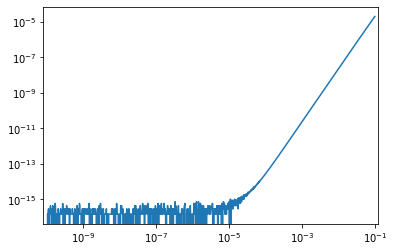

In [194]:
B_a = u.Quantity([NIntegrate(bb_7500, a, 24, 10000, 1/u.micron) for a in a_list])

x_a = (a_list[1:] + a_list[:-1]) / 2
y_a = np.abs(np.diff(B_a)) / B_a[:-1]

a_converge = np.where(y_a < 1e-16)[0][-1]
print(x_a[a_converge])

plt.plot(x_a, y_a)
plt.loglog()

21.56156156156156


[]

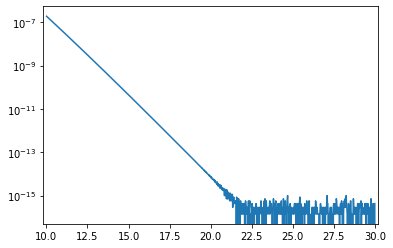

In [195]:
B_b = u.Quantity([NIntegrate(bb_7500, 1e-7, b, 10000, 1/u.micron) for b in b_list])

x_b = (b_list[1:] + b_list[:-1]) / 2
y_b = np.abs(np.diff(B_b)) / B_b[:-1]

b_converge = np.where(y_b < 1e-16)[0][0]
print(x_b[b_converge])

plt.plot(x_b, y_b)
plt.semilogy()

1202.4989185181857


[]

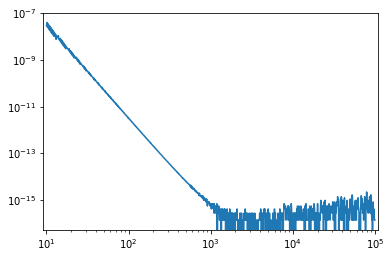

In [197]:
B_d = u.Quantity([NIntegrate(bb_7500, 1e-7, 24, d, 1/u.micron) for d in d_list])

x_d = (d_list[1:] + d_list[:-1]) / 2
y_d = np.abs(np.diff(B_d)) / B_d[:-1]

d_converge = np.where(y_d < 1e-16)[0][0]
print(x_d[d_converge])

plt.plot(x_d, y_d)
plt.loglog()

### Make pretty plots

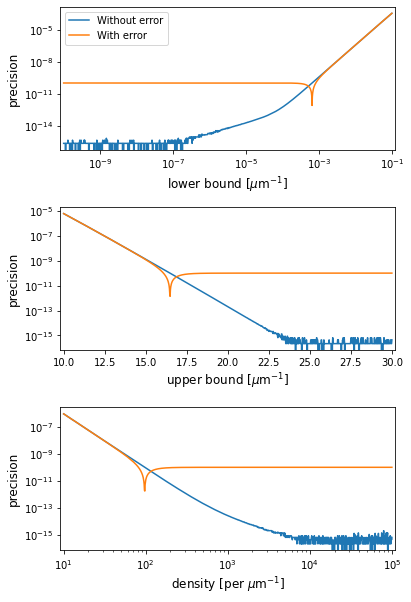

In [224]:
fig, axs = plt.subplots(3, 1, figsize = (6, 10), gridspec_kw={'hspace':0.4})

axs[0].plot(a_list, prec_a, label='Without error')
axs[0].plot(a_list, err_a, label='With error')
axs[0].set_xlabel('lower bound [$\mu$m$^{-1}$]')
axs[0].loglog()
axs[0].legend()

axs[1].plot(b_list, prec_b)
axs[1].plot(b_list, err_b)
axs[1].set_xlabel('upper bound [$\mu$m$^{-1}$]')
axs[1].semilogy()

axs[2].plot(d_list, prec_d)
axs[2].plot(d_list, err_d)
axs[2].set_xlabel('density [per $\mu$m$^{-1}$]')
axs[2].loglog()

for i in range(3):
    axs[i].set_ylabel(r'precision')

plt.savefig('hw2_fig2.png', bbox_inches='tight')
plt.show()

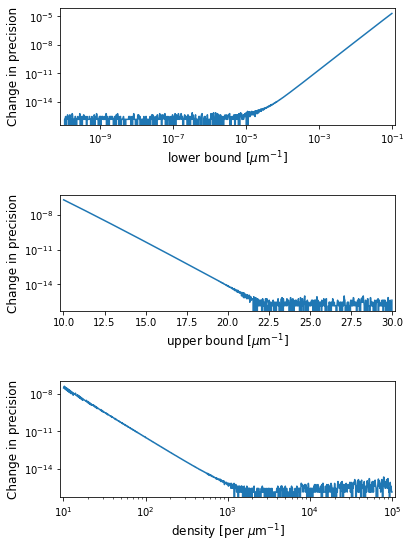

In [223]:
fig, axs = plt.subplots(3, 1, figsize = (6, 9), gridspec_kw={'hspace':0.6})

axs[0].plot(x_a, y_a)
axs[0].set_xlabel('a')
axs[0].loglog()
axs[0].set_xlabel('lower bound [$\mu$m$^{-1}$]')

axs[1].plot(x_b, y_b)
axs[1].set_xlabel('upper bound [$\mu$m$^{-1}$]')
axs[1].semilogy()

axs[2].plot(x_d, y_d)
axs[2].set_xlabel('density [per $\mu$m$^{-1}$]')
axs[2].loglog()

for i in range(3):
    axs[i].set_ylabel(r'Change in precision')

plt.savefig('hw2_fig3.png', bbox_inches='tight')
plt.show()